#  Garbage Classification using CNN

## 📅 Week 1 Submission: Dataset Import and Preparation

This project focuses on classifying garbage images into categories such as organic, recyclable, and hazardous using a Convolutional Neural Network (CNN). In Week 1, we aim to import the dataset into Google Colab, organize it properly, and validate that image files are loaded correctly.

### 🔧 Tools & Libraries Used:
- Google Colab
- Python
- TensorFlow/Keras
- OpenCV
- Matplotlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

dataset_path = '/content/drive/MyDrive/TrashType_Image_Dataset'  # replace with actual path
for folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder)
    print(f'{folder}: {len(os.listdir(folder_path))} images')

plastic: 482 images
paper: 604 images
metal: 410 images
glass: 511 images
cardboard: 403 images
trash: 137 images


# 🖼️ Sample Image Preview

To verify that our dataset was uploaded correctly, we display a few random images from the dataset along with their categories.

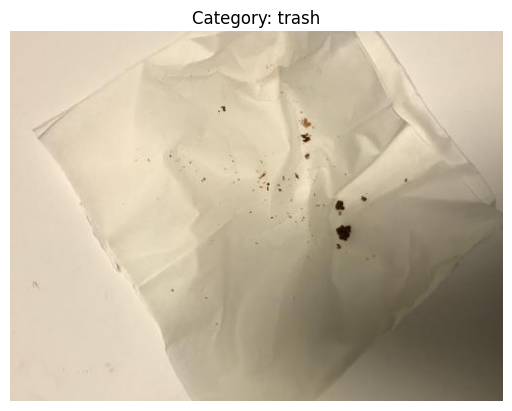

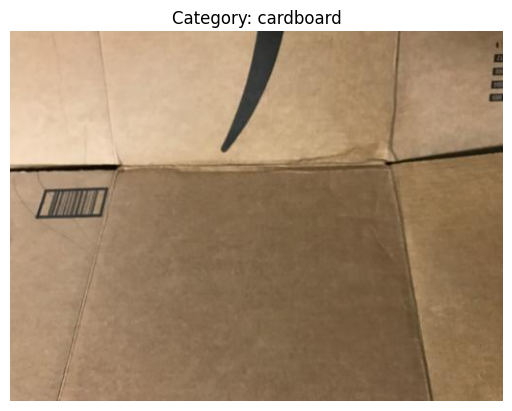

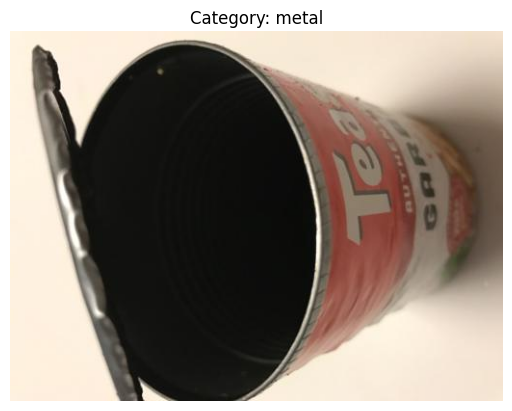

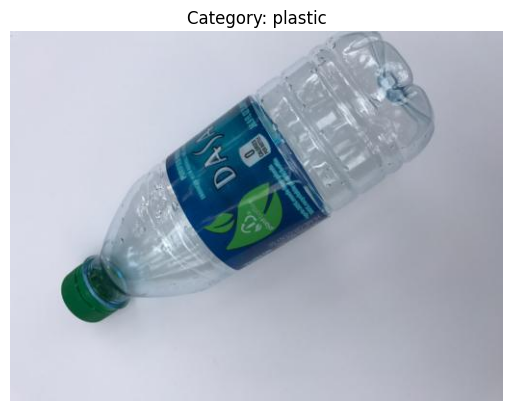

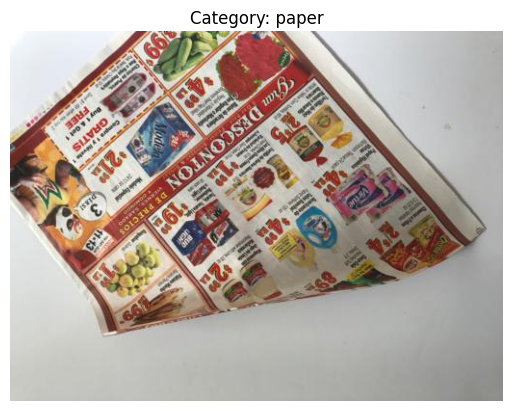

In [ ]:
import matplotlib.pyplot as plt
import cv2
import random

categories = os.listdir(dataset_path)

for _ in range(5):
    category = random.choice(categories)
    path = os.path.join(dataset_path, category)
    image_name = random.choice(os.listdir(path))
    image = cv2.imread(os.path.join(path, image_name))
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.imshow(image_rgb)
    plt.title(f'Category: {category}')
    plt.axis('off')
    plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_size = (150, 150)  # You can adjust this as needed
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 2040 images belonging to 6 classes.
Found 507 images belonging to 6 classes.


In [ ]:
# create a CNN model
from tensorflow.keras import Input

model = Sequential([
    Input(shape=(150, 150, 3)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_generator.num_classes, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.2392 - loss: 2.6914

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


64/64 ━━━━━━━━━━━━━━━━━━━━ 463s 7s/step - accuracy: 0.2404 - loss: 2.6791 - val_accuracy: 0.4753 - val_loss: 1.4289
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.4557 - loss: 1.3695 - val_accuracy: 0.4260 - val_loss: 1.3529
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - accuracy: 0.4996 - loss: 1.2197 - val_accuracy: 0.5168 - val_loss: 1.1905
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 150s 2s/step - accuracy: 0.5954 - loss: 1.0378 - val_accuracy: 0.5602 - val_loss: 1.1563
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.6593 - loss: 0.8751 - val_accuracy: 0.5542 - val_loss: 1.2278
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.7153 - loss: 0.7764 - val_accuracy: 0.6114 - val_loss: 1.2556
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.8160 - loss: 0.5623 - val_accuracy: 0.6075 - val_loss: 1.2416
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.8563 - loss: 0.4248 - val_accuracy: 0.6213 - val_loss: 1.3623
E

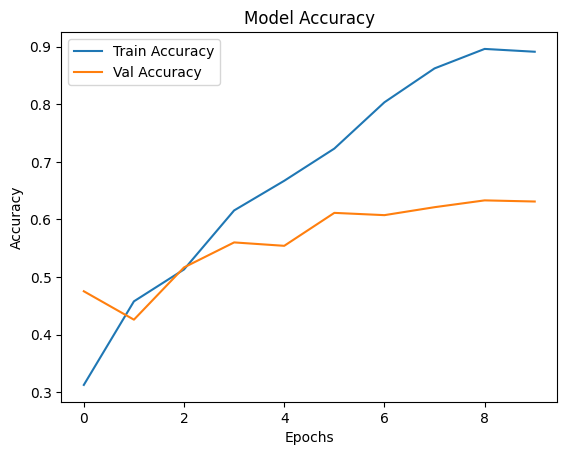

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()